In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

In [20]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [21]:
data.shape

(30000, 25)

In [22]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [23]:
next_month = data['default.payment.next.month'].value_counts()

In [24]:
next_month

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [25]:
df = pd.DataFrame({'default.payment.next.month': next_month.index, 'values': next_month.values})

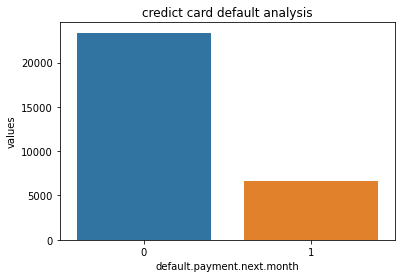

In [26]:
plt.title('credict card default analysis')
sns.barplot(x='default.payment.next.month', y = 'values', data = df)
plt.show()

In [27]:
data.drop(['ID'], inplace=True, axis = 1)

In [28]:
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [30]:
train_x, test_x, train_y, test_y = train_test_split(features, target)

In [31]:
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
]

Classifiers_names = ['svc', 'decisiontreeclassifier', 'randomforestclassfier', 'kneighborsclassifier']

In [32]:
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

In [41]:
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid , score = 'accuracy'):
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid)
    search = gridsearch.fit(train_x, train_y)
    
    predict_y = gridsearch.predict(test_x)
    print('最优参数', search.best_params_)
    print('最优分数', search.best_score_)
    print('准确率 %0.4lf' %accuracy_score(test_y, predict_y))

In [42]:
for model, model_name, model_param_grid in zip(classifiers, Classifiers_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')


最优参数 {'svc__C': 1, 'svc__gamma': 0.01}
最优分数 0.8151999999999999
准确率 0.8213
最优参数 {'decisiontreeclassifier__max_depth': 6}
最优分数 0.8174222222222222
准确率 0.8223


ValueError: Invalid parameter randomforestclassifier for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforestclassfier', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.